## 1. The dataset
Nous utilisons un dataset mis à disposition sur Kaggle 

In [2]:
# Import pandas library
import pandas as pd

# Lit le csv dans disney_movies 
disney_movies = pd.read_csv('./datasets/disney_movies_total_gross.csv', parse_dates=['release_date']) 

# Print les 15 premières valeurs
disney_movies.head(15)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [10]:
# La shape du dataset 
disney_movies.shape

(579, 6)

Indeed, this dataset have 579 diferrents movies for 6 differents features 

## Information about the Dataset

In [13]:
#Tri les film en fonction de leur bénéfices
top_inflation_disney_movies = disney_movies.sort_values(by='inflation_adjusted_gross',ascending= False)
top_inflation_disney_movies.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


According to this sort, it's seems that some genre are related to inflation_adjusted_gross, so we will see group the year and genre to see the inflation_adjusted_gross by year and genre.

In [18]:
#Ajoute une nouvelle feature 'année' dans le dataset
disney_movies['release_year']=pd.DatetimeIndex(disney_movies["release_date"]).year
disney_movies.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994,1954
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832,1959
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574,1961


In [28]:
#Group year and genre using the mean of total_gross and inflation_adjusted_gross
group_inflation_year = disney_movies.groupby(['release_year','genre']).mean()


# Convert the GroupBy object to a DataFrame
group_inflation_year = group_inflation_year.reset_index()
group_inflation_year.head(10)

,release_year,genre,total_gross,inflation_adjusted_gross
0,1937,Musical,184925485.0,5.228953e+09
1,1940,Adventure,84300000.0,2.188229e+09
2,1940,Musical,83320000.0,2.187091e+09
3,1946,Adventure,65000000.0,1.078511e+09
4,1950,Drama,85000000.0,9.206087e+08
5,1954,Adventure,28200000.0,5.282800e+08
6,1955,Drama,93600000.0,1.236036e+09
7,1959,Drama,9464608.0,2.150583e+07
8,1961,Comedy,89190703.5,8.364828e+08
9,1961,Musical,10218316.0,1.248412e+08


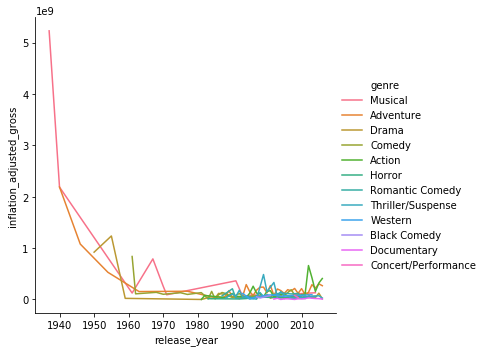

In [38]:
# Import library
import seaborn as sns

#Inutile ici il y a trop de disparité entre les valeurs(il faudrait cibler des années et normalizé les valeurs)
'barplot = sns.barplot(x="release_year", y="inflation_adjusted_gross", hue="genre", data=group_inflation_year)'


ax = sns.relplot(x="release_year", y="inflation_adjusted_gross", hue="genre", kind='line', data=group_inflation_year )


Durant les dernières années, les genres Action et Aventures sont en developpement, ainsi on en vient à ce demander le lien entre le genre et les benéfices. Ainsi nous allons realisé en regression lineaire entre ces 2 features

## Data Preparation 

Nous allons utilisé les 'dummies' pour pourvoir transformer les valeures qualitatives de genre en valeurs quantitative pour pouvoir utliser la régression lineaire

In [40]:
# Convertit genre variable en dummy variables 
genre_dummies =  pd.get_dummies(disney_movies['genre'],drop_first=True)

# Affichage
genre_dummies.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


### Utilisation de la Régression Lineaire de SK-Learn  : 

In [52]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Construction du modèle de regression 
regression = LinearRegression()

# Fit les données
regression.fit(genre_dummies,disney_movies['inflation_adjusted_gross'])
# On récupère les coefficients de aventures et action

#Ici dans les tableau des dummies action n'est pas présent ainsi il est l'intersection dans le modèle 
action =regression.intercept_
#
adventure=regression.coef_[0]

print(action, adventure)

102921757.36841914 87475654.70910046


Il semblerait que le genre action influe plus sur la feature 'ajusted_gross'

### Intevalle de Confiance à 95 %

En Utilisant la boostrap méthode : 
https://www.youtube.com/watch?v=O_Fj4q8lgmc&ab_channel=MarinStatsLectures-RProgramming%26Statistics

In [55]:
# Import module
import numpy as np

# Creer un table pour nos echantillons :
inds = np.arange(len(disney_movies['genre']))

# Initialise 500 données
size = 500
bs_action_reps =  np.empty(size)
bs_adventure_reps =  np.empty(size)

Après l'initialisation, nous réaliserons des estimations bootstrap par paires pour les paramètres de régression. 

In [57]:
# On génère les répliques   
for i in range(size):
    
    # Rééchantillones les indices
    bs_inds = np.random.choice(inds, size=len(inds))
        
    # Récupére les données pour les échantillonages
    bs_genre = disney_movies['genre'][bs_inds]
    bs_gross = disney_movies['inflation_adjusted_gross'][bs_inds]
    
    # Convertit en dummies variable
    bs_dummies = pd.get_dummies(bs_genre, drop_first=True)  
    
    # Construit et fit le modèle 
    regr = LinearRegression().fit(bs_dummies, bs_gross)
    
    # Récupère les coefficients comme précedemment 
    bs_action_reps[i] = regr.intercept_
    bs_adventure_reps[i] = regr.coef_[[0]][0]

On Récupère ainsi les intervalles de confiance pour le genre action et adventure

In [64]:
confidence_interval_action = np.percentile(bs_action_reps, [2.5, 97.5])
confidence_interval_adventure = np.percentile(bs_adventure_reps, [2.5, 97.5])
    
print(confidence_interval_action)
print(confidence_interval_adventure)

[7.07057167e+07 1.42051696e+08]
[2.87175211e+07 1.39812272e+08]


##### Ainsi d'après l'intervalle de confiance à 95%, Disney devrait faire plus de film d'action que de film d'aventure. Ainsi on pourrait s'attendre à plus de film d'Action dans ces prochaines années 